In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')

# Get summary statistics for numerical columns
description = df.describe()
print(description)


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df contains your dataset
# Assuming you want to predict 'Calories' based on 'Duration', 'Pulse', and 'Maxpulse'

# Data preprocessing
X = df[['Duration', 'Pulse', 'Maxpulse']].values
y = df['Calories'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Reshape input to be [samples, time steps, features]
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Building the RNN
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 3)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluating the model
loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 79511.4375
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 79509.1094
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 79506.7734
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 79504.4219
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 79502.0312
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 79499.5938
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 79497.1328
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 79494.6250
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 79492.0625
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 79489.4375
Epoch 11/50
1/1 [==============================] - 0s 16ms/step - loss: 79486.7500
Epoch 12/50
1/1 [==============================] - 0s 16ms/step - loss: 79484.0000
Epoch 13/50
1/1

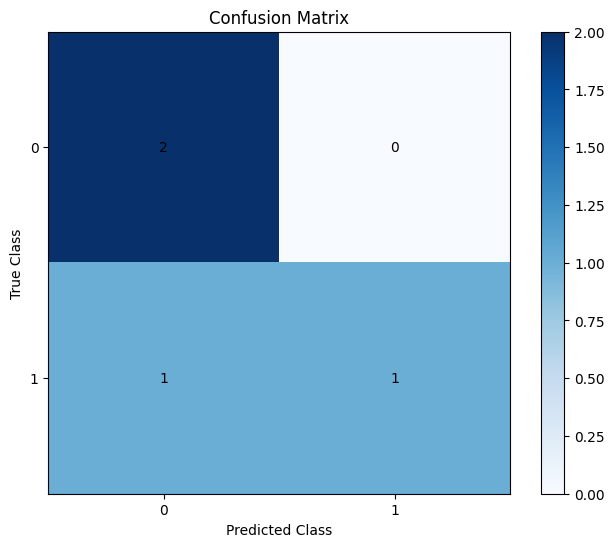

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = {
    'Duration': [45, 60, 60, 45, 60, 60, 45, 60, 60, 60, 60, 60, 45, 45, 60, 60, 45, 60, 60, 45],
    'Pulse': [110, 117, 103, 109, 117, 102, 110, 104, 98, 98, 100, 90, 103, 100, 106, 104, 98, 98, 100, 98],
    'Maxpulse': [130, 145, 130, 128, 145, 135, 135, 132, 123, 132, 124, 136, 137, 128, 138, 127, 123, 132, 124, 136],
    'Calories': [250, 318, 300, 224, 321, 376, 263, 286, 300, 286, 244, 300, 246, 236, 300, 342, 242, 232, 246, 300]
}

df = pd.DataFrame(data)

# Define calorie ranges for classification
calorie_ranges = [(0, 200), (200, 300), (300, 400), (400, 500)]

# Define function to map calories to classes
def map_calories_to_class(calories):
    for i, (lower, upper) in enumerate(calorie_ranges):
        if lower <= calories < upper:
            return i
    return len(calorie_ranges)  # Last class for values outside defined ranges

# Map calories to classes
df['CalorieClass'] = df['Calories'].apply(map_calories_to_class)

# Split the dataset into features and target
X = df[['Duration', 'Pulse', 'Maxpulse']]
y = df['CalorieClass']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the classes
y_pred = clf.predict(X_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Get number of unique classes from true labels and predicted labels
num_classes = len(set(y_test) | set(y_pred))

# Set tick marks and labels
plt.xticks(range(num_classes))
plt.yticks(range(num_classes))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add labels to the plot
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
